In [1]:
<img src="petro.png" alt="drawing" width="25%"/>

SyntaxError: invalid syntax (1791523559.py, line 1)

# Carregamento dos Dados

In [2]:
import pandas as pd
df = pd.read_csv("PETR4_sem_2014.txt")
df.tail()
type(df)
df



,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,9.990000,9.990000,9.350000,9.360000,7.057712,49559500
1,2015-01-05,9.140000,9.190000,8.530000,8.560000,6.454490,78385100
2,2015-01-06,8.710000,8.830000,8.040000,8.280000,6.243360,84723300
3,2015-01-07,8.560000,8.730000,8.360000,8.670000,6.537432,85531000
4,2015-01-08,8.790000,9.390000,8.740000,9.230000,6.959689,83306300
...,...,...,...,...,...,...,...
1733,2021-12-23,28.330000,28.420000,28.150000,28.330000,28.330000,28713600
1734,2021-12-27,28.320000,28.780001,28.150000,28.750000,28.750000,44227900
1735,2021-12-28,29.010000,29.280001,28.700001,28.780001,28.780001,30688100
1736,2021-12-29,28.700001,28.900000,28.420000,28.540001,28.540001,35508400


# Tem linha do dataframe com dados faltando?

In [3]:
df[df.isna().any(axis=1)] #verifica qual linha é

,Date,Open,High,Low,Close,Adj Close,Volume


In [4]:
len(df)

1738

In [5]:
df = df.dropna()

len(df)

1738

In [6]:
prices = df['Close']
prices

0        9.360000
1        8.560000
2        8.280000
3        8.670000
4        9.230000
          ...    
1733    28.330000
1734    28.750000
1735    28.780001
1736    28.540001
1737    28.450001
Name: Close, Length: 1738, dtype: float64

# Visualização dos Dados

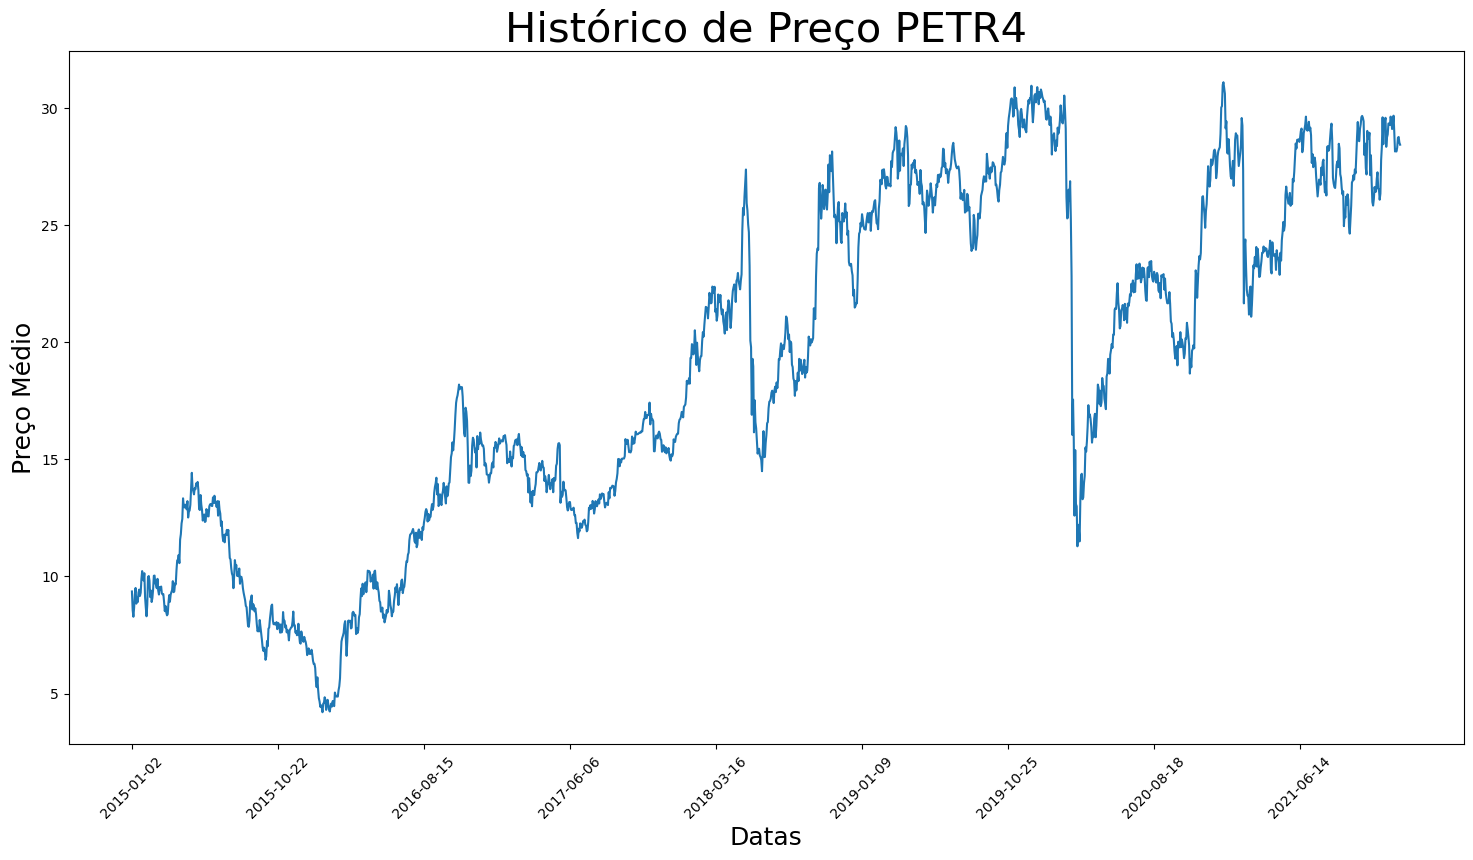

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18,9))
plt.plot(df['Close'])
plt.xticks(range(0,df.shape[0],200), df['Date'].loc[::200], rotation=45)
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Preço Médio', fontsize=18)
plt.title("Histórico de Preço PETR4", fontsize=30)
plt.show()

In [8]:
days_time_step = 30

# Separação Teste e Treino

In [9]:
import numpy as np
training_size = int(len(prices) * 0.95)
test_size = len(prices) - training_size
train_data, input_data = np.array(prices[0:training_size]), np.array(prices[training_size - days_time_step:])
test_data = np.array(prices[training_size:])
train_data
test_data
train_data.shape, test_data.shape, input_data.shape
test_data


array([27.73    , 27.49    , 28.49    , 28.299999, 27.190001, 27.040001,
       26.6     , 26.33    , 26.459999, 24.969999, 25.5     , 25.34    ,
       26.23    , 25.879999, 26.33    , 26.1     , 24.93    , 24.65    ,
       25.209999, 25.85    , 26.84    , 26.9     , 27.139999, 26.959999,
       27.389999, 27.23    , 28.      , 28.790001, 29.42    , 28.639999,
       28.6     , 29.120001, 29.32    , 29.629999, 29.68    , 29.6     ,
       29.450001, 28.01    , 28.5     , 27.450001, 27.18    , 29.040001,
       28.76    , 28.690001, 28.959999, 27.15    , 28.      , 26.85    ,
       26.      , 25.85    , 26.120001, 26.639999, 26.43    , 26.450001,
       26.99    , 27.27    , 26.58    , 26.540001, 26.1     , 26.360001,
       27.799999, 28.370001, 29.620001, 28.469999, 29.469999, 29.43    ,
       29.6     , 28.360001, 28.76    , 28.889999, 29.360001, 29.35    ,
       29.290001, 29.65    , 29.469999, 29.120001, 29.299999, 29.690001,
       28.99    , 28.16    , 28.200001, 28.16    , 

In [10]:
range(0,df.shape[0],200)
df['Date'].loc[::100]

0       2015-01-02
100     2015-05-29
200     2015-10-22
300     2016-03-23
400     2016-08-15
500     2017-01-09
600     2017-06-06
700     2017-10-24
800     2018-03-16
900     2018-08-09
1000    2019-01-09
1100    2019-06-05
1200    2019-10-25
1300    2020-03-25
1400    2020-08-18
1500    2021-01-15
1600    2021-06-14
1700    2021-11-05
Name: Date, dtype: object

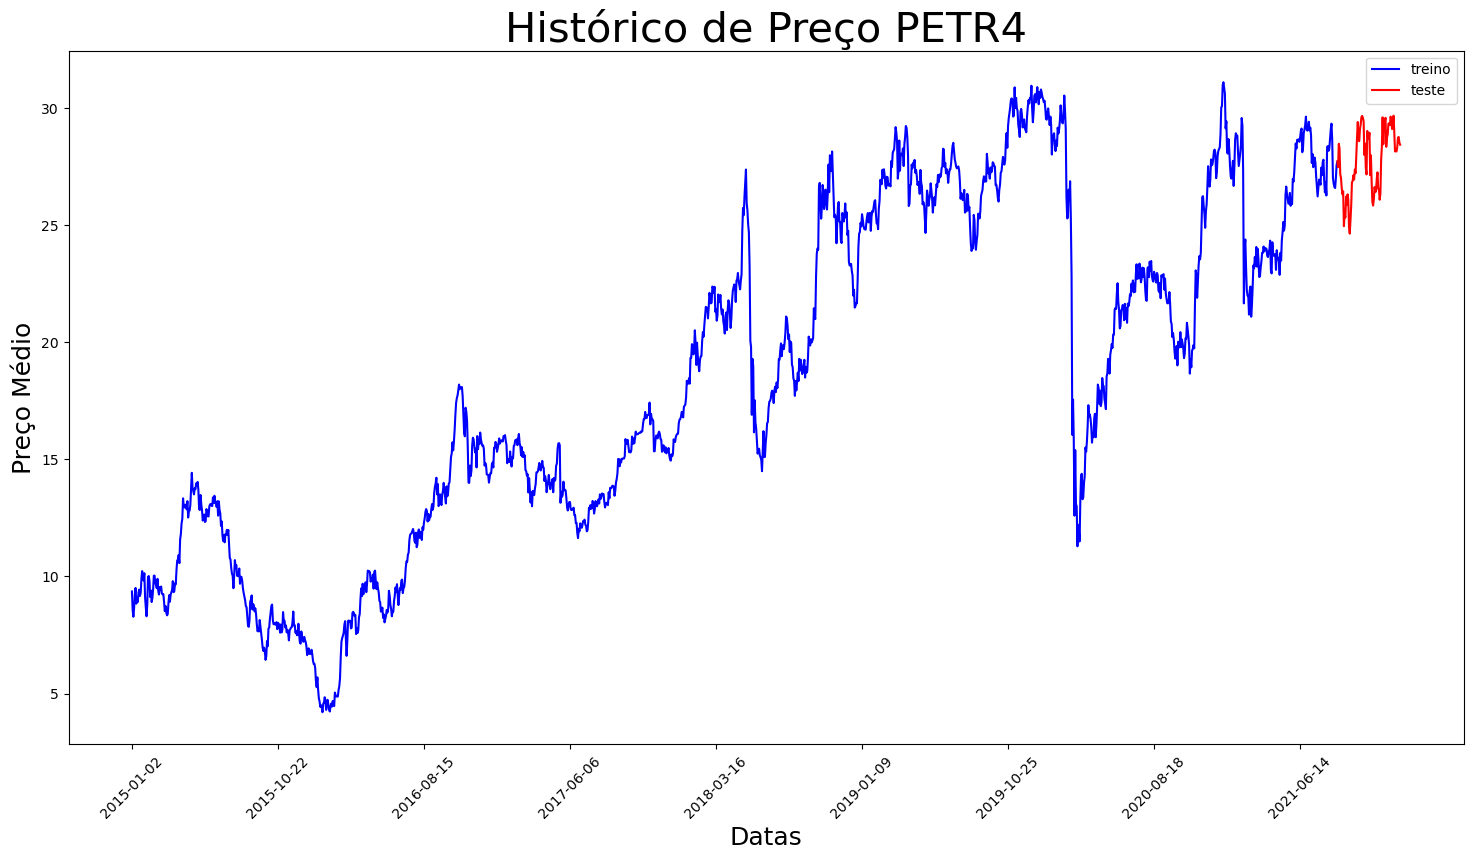

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18,9))
plt.plot(df['Close'].loc[0:train_data.shape[0]], color = 'blue', label = 'treino')
plt.plot(df['Close'].loc[train_data.shape[0]:], color = 'red', label = 'teste')
plt.xticks(range(0,df.shape[0],200), df['Date'].loc[::200], rotation=45)
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Preço Médio', fontsize=18)
plt.title("Histórico de Preço PETR4", fontsize=30)
plt.legend()
plt.show()

# Normalização dos Dados

In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_data_norm = scaler.fit_transform(np.array(train_data).reshape(-1,1))
test_data_norm = scaler.transform(np.array(input_data).reshape(-1,1))
val_data_norm = scaler.transform(np.array(test_data).reshape(-1,1))

train_data_norm.shape
test_data_norm.shape
len(test_data)





87

In [14]:
#teste
X_test = []
for i in range(days_time_step, days_time_step + len(test_data)):
    X_test.append(test_data_norm[i-days_time_step:i])
type(X_test)
np.array(X_test).shape


(87, 30, 1)

# Pré-processamento (Gerando X e y)

In [15]:
#treino
X_train, y_train = [], []
for i in range(days_time_step, len(train_data)):
    X_train.append(train_data_norm[i-days_time_step:i])
    y_train.append(train_data_norm[i])
    
#teste
X_test = []
for i in range(days_time_step, days_time_step + len(test_data)):
    X_test.append(test_data_norm[i-days_time_step:i])
    
#val
X_val, y_val = [], []
for i in range(days_time_step, len(test_data)):
    X_val.append(val_data_norm[i-days_time_step:i])
    y_val.append(val_data_norm[i])

#converter tudo pra matriz numpy
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
X_val = np.array(X_val)
y_val = np.array(y_val)

X_val.shape



(57, 30, 1)

# Treinamento de Rede Neural

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(days_time_step, 1)))
#model.add(Dropout(0.3))
model.add(LSTM(100, return_sequences=False, input_shape=(days_time_step, 1)))
#model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [17]:
h = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=30, batch_size=32)

Epoch 1/30
51/51 [==============================] - 10s 87ms/step - loss: 0.0204 - val_loss: 0.0027
Epoch 2/30
51/51 [==============================] - 3s 63ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 3/30
51/51 [==============================] - 3s 63ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 4/30
51/51 [==============================] - 3s 64ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 5/30
51/51 [==============================] - 3s 63ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 6/30
51/51 [==============================] - 3s 64ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 7/30
51/51 [==============================] - 3s 64ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 8/30
51/51 [==============================] - 3s 63ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 9/30
51/51 [==============================] - 3s 63ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 10/30
51/51 [==============================] - 3s 64ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 11

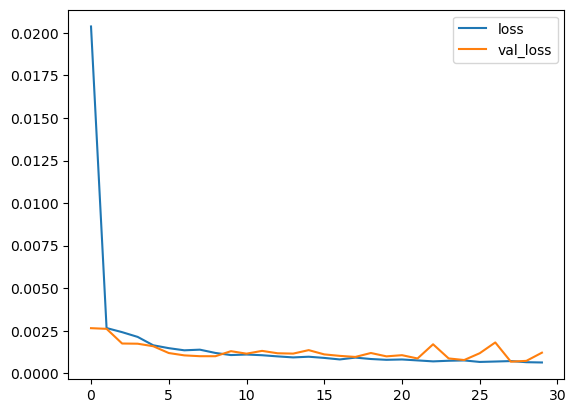

In [18]:
import matplotlib.pyplot as plt

plt.plot(h.history["loss"], label='loss')
plt.plot(h.history["val_loss"], label='val_loss')
plt.legend()

# Avaliação de Resultados

In [21]:
#predição de valores pela rede
predict = model.predict(X_test)

#transformação inversa do normalizador, pra que possamos plotar no gráfico os resultados
predict = scaler.inverse_transform(predict)
real = test_data

predict.shape
real.shape



3/3 [==============================] - 0s 21ms/step


(87,)

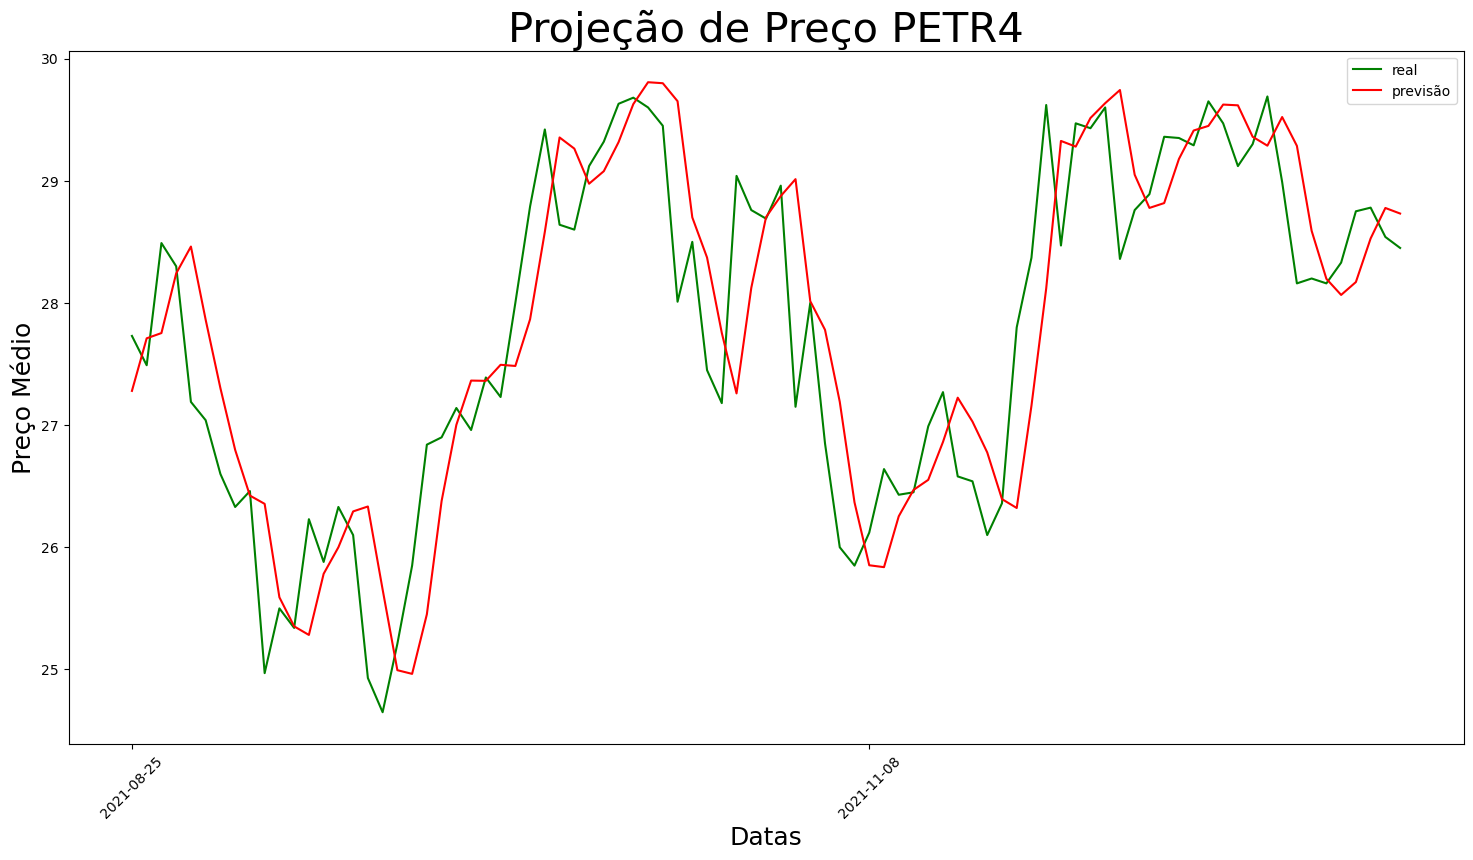

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18,9))
plt.plot(real, color = 'green', label = 'real')
plt.plot(predict, color = 'red', label = 'previsão')
plt.xticks(range(0, len(real), 50), df['Date'].iloc[- len(real)::50], rotation=45)
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Preço Médio', fontsize=18)
plt.title("Projeção de Preço PETR4", fontsize=30)
plt.legend()
plt.show()

In [39]:
import math
from sklearn.metrics import mean_squared_error
mean_squared_error(real, predict)

0.4788308058056951

# Experimento 2: Estimando sem informar o conjunto de teste todo

In [40]:
X_test[0:1]

array([[[0.90861809],
        [0.90861809],
        [0.90936104],
        [0.90527485],
        [0.91196133],
        [0.92236256],
        [0.92644867],
        [0.88893009],
        [0.89598808],
        [0.91939079],
        [0.92496282],
        [0.9323922 ],
        [0.94539372],
        [0.92496282],
        [0.92310543],
        [0.92793459],
        [0.93722136],
        [0.9234769 ],
        [0.92793459],
        [0.91567604],
        [0.87184246],
        [0.88595833],
        [0.86515599],
        [0.87407129],
        [0.8803863 ],
        [0.87184246],
        [0.84992567],
        [0.83506683],
        [0.81872211],
        [0.83172359]]])

In [41]:
predicted_days = 30

X_predicted = X_test[0:1].copy() #pega o primeiro dia do conjunto de teste
future_projection = []
for d in range(predicted_days):
    #predição de valores pela rede
    next_t = model.predict(X_predicted)
    future_projection.append(next_t[0, 0])
    
    #remove primeiro preço da sequência
    temp = np.delete(X_predicted[0], 0)

    #insere último preço da sequência
    temp = np.append(temp, next_t)
    
    #recoloca no formato tensorflow
    X_predicted[0] = np.reshape(temp, (predicted_days, 1))
    
future_projection = scaler.inverse_transform(np.array(future_projection).reshape(-1, 1))

future_projection

array([[26.627796],
       [26.79308 ],
       [26.944233],
       [27.105595],
       [27.285637],
       [27.487398],
       [27.71081 ],
       [27.953785],
       [28.21333 ],
       [28.485928],
       [28.768238],
       [29.057348],
       [29.350693],
       [29.646067],
       [29.941692],
       [30.235891],
       [30.527206],
       [30.81433 ],
       [31.09622 ],
       [31.371918],
       [31.640717],
       [31.902143],
       [32.155624],
       [32.400913],
       [32.637707],
       [32.865875],
       [33.085445],
       [33.29655 ],
       [33.499367],
       [33.694138]], dtype=float32)

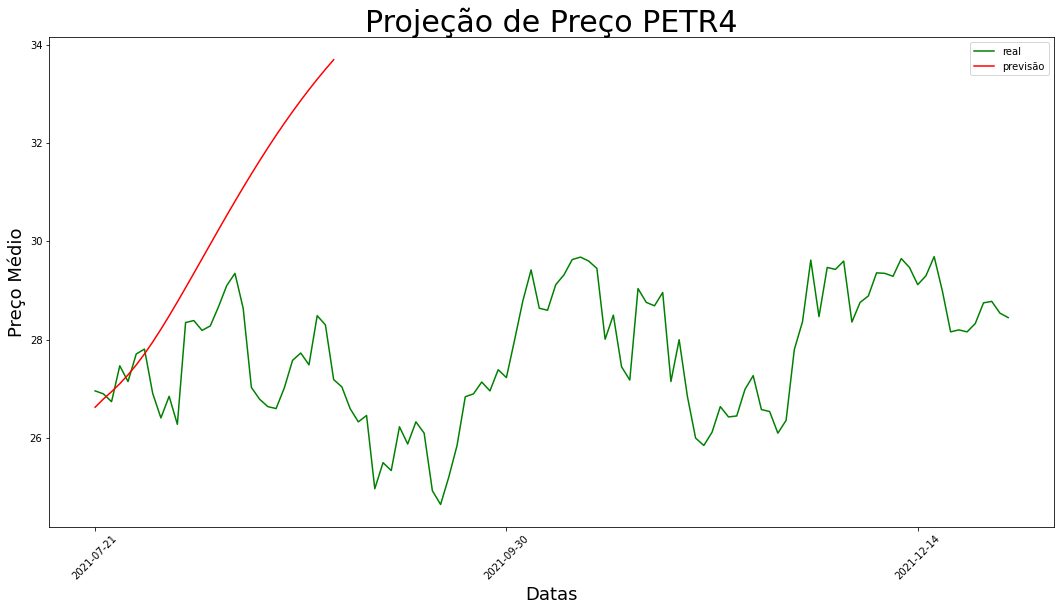

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18,9))
plt.plot(real, color = 'green', label = 'real')
plt.plot(future_projection, color = 'red', label = 'previsão')
plt.xticks(range(0, len(real), 50), df['Date'].iloc[- len(real)::50], rotation=45)
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Preço Médio', fontsize=18)
plt.title("Projeção de Preço PETR4", fontsize=30)
plt.legend()
plt.show()

# Referências

* https://www.datacamp.com/community/tutorials/lstm-python-stock-market
* https://www.analyticsvidhya.com/blog/2021/05/stock-price-prediction-and-forecasting-using-stacked-lstm/#:~:text=LSTMs%20are%20widely%20used%20for,the%20information%20that%20is%20not.
* https://www.analyticsvidhya.com/blog/2021/12/stock-price-prediction-using-lstm/
* https://medium.com/alexandre-george-lustosa/previs%C3%A3o-de-pre%C3%A7o-petr4-com-python-lstm-f93722be59e0
* https://finance.yahoo.com/quote/PETR4.SA/history?period1=1356998400&period2=1640995200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
* http://revistagt.fpl.edu.br/get/article/view/1930/1230